In [188]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, dimension_reduction, calc_contribution, calc_contribution_rank

In [190]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

# 4. day clustering
copy_df = df.copy()

In [191]:
# 4. day clustering
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [192]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

10 / 248 ==> 86.59628456977627
20 / 248 ==> 80.82296794840676
30 / 248 ==> 82.23135506571295
40 / 248 ==> 80.46744292905464
50 / 248 ==> 85.19778836730153
60 / 248 ==> 80.47285010675076
70 / 248 ==> 82.77872681668266
80 / 248 ==> 82.12326155986513
90 / 248 ==> 87.66556368302918
100 / 248 ==> 80.3039011340624
110 / 248 ==> 81.70819615642581
120 / 248 ==> 80.83840571203531
130 / 248 ==> 85.82098420991345
140 / 248 ==> 82.85745011546395
150 / 248 ==> 84.53233392503681
160 / 248 ==> 89.26326671426952
170 / 248 ==> 84.03353228536416
180 / 248 ==> 80.19469436362769
190 / 248 ==> 80.71035925625807
200 / 248 ==> 85.56328514789419
210 / 248 ==> 86.39270748851999
220 / 248 ==> 80.17612131271424
230 / 248 ==> 82.7452042544218
240 / 248 ==> 81.6776776569237
248 / 248 ==> 81.35937038585347


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,3.0,6.0,3.0,5.0,5.0,0.0,6.0,4.0,4.0,6.0,...,4.0,6.0,4.0,3.0,2.0,3.0,6.0,6.0,4.0,3.0
1,2.0,5.0,6.0,1.0,1.0,5.0,5.0,2.0,5.0,5.0,...,5.0,6.0,2.0,5.0,3.0,2.0,6.0,6.0,6.0,0.0
2,6.0,2.0,2.0,2.0,2.0,6.0,4.0,6.0,6.0,6.0,...,2.0,3.0,3.0,4.0,0.0,4.0,4.0,6.0,3.0,4.0
3,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,3.0,...,3.0,6.0,4.0,2.0,2.0,5.0,3.0,4.0,4.0,5.0
4,4.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,2.0,4.0,...,2.0,5.0,5.0,2.0,0.0,3.0,1.0,3.0,3.0,6.0


In [193]:
data_np = df.values
division_data_np = data_np.reshape(-1, size, len(data_np[0]))

sum_division_data_np = division_data_np.sum(axis=1)
sum_df = pd.DataFrame(
    sum_division_data_np,
    columns=df.columns,
    index=df.index[::size]
)

In [194]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

contribution_df.head()

rank!


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,5.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0,3.0,...,4.0,3.0,4.0,5.0,6.0,5.0,3.0,3.0,4.0,5.0
2018-05-01 03:00:00,4.0,2.0,3.0,1.0,1.0,2.0,2.0,4.0,2.0,2.0,...,2.0,3.0,4.0,2.0,6.0,4.0,3.0,3.0,3.0,5.0
2018-05-01 06:00:00,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,...,1.0,5.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,3.0
2018-05-01 09:00:00,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,5.0,1.0,...,1.0,6.0,2.0,3.0,3.0,5.0,1.0,2.0,2.0,5.0
2018-05-01 12:00:00,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,5.0,2.0,...,5.0,5.0,5.0,5.0,7.0,3.0,1.0,3.0,3.0,6.0


# 해결과제 : kWh가 높은데도, 기여도가 적게나오는 가구 분석

In [195]:
cnt = 0

sum_df = df.sum().round()
cont_mean_df = contribution_df.mean().round()
_UFO = list()
_UFO_cont = list()

for col in df:
    _me = sum_df[col]
    targets = sum_df[sum_df > _me].index
    
    for t_col in targets:
        _target = sum_df[t_col]
        me_cont = cont_mean_df[col]
        t_cont = cont_mean_df[t_col]
        
        if me_cont > t_cont:
            cnt += 1
            if t_col not in _UFO:
                _UFO.append(t_col)
                _UFO_cont.append(t_cont)
            print(col, t_col,_me, _target ,me_cont, t_cont, "오차 : {}".format(me_cont - t_cont))
            

print("에러 개수 : {}".format(cnt))
print("미확인 가구({}) : {}".format(len(_UFO),_UFO))
print("{}".format(_UFO_cont))

아파트1-104-1307 아파트1-104-1206 161.0 165.0 3.0 2.0 오차 : 1.0
아파트1-104-1307 아파트1-104-203 161.0 164.0 3.0 2.0 오차 : 1.0
아파트1-104-1307 아파트1-104-204 161.0 171.0 3.0 2.0 오차 : 1.0
아파트1-103-202 아파트1-101-402 305.0 312.0 5.0 4.0 오차 : 1.0
아파트1-103-202 아파트1-103-106 305.0 330.0 5.0 4.0 오차 : 1.0
아파트1-103-202 아파트1-102-404 305.0 306.0 5.0 4.0 오차 : 1.0
아파트1-103-202 아파트1-102-1201 305.0 306.0 5.0 4.0 오차 : 1.0
아파트1-101-1002 아파트1-101-502 230.0 231.0 4.0 3.0 오차 : 1.0
아파트1-101-1002 아파트1-102-401 230.0 232.0 4.0 3.0 오차 : 1.0
아파트1-101-1403 아파트1-102-802 418.0 419.0 6.0 5.0 오차 : 1.0
아파트1-102-301 아파트1-103-106 313.0 330.0 5.0 4.0 오차 : 1.0
아파트1-102-1002 아파트1-101-402 297.0 312.0 5.0 4.0 오차 : 1.0
아파트1-102-1002 아파트1-102-104 297.0 301.0 5.0 4.0 오차 : 1.0
아파트1-102-1002 아파트1-103-505 297.0 303.0 5.0 4.0 오차 : 1.0
아파트1-102-1002 아파트1-103-106 297.0 330.0 5.0 4.0 오차 : 1.0
아파트1-102-1002 아파트1-102-404 297.0 306.0 5.0 4.0 오차 : 1.0
아파트1-102-1002 아파트1-102-1201 297.0 306.0 5.0 4.0 오차 : 1.0
아파트1-103-1805 아파트1-102-802 409.0 419.0 6.0 5.0 오차 

In [196]:
cols = df.columns

In [197]:
cols

Index(['아파트1-104-1206', '아파트1-104-303', '아파트1-104-1307', '아파트1-104-1208',
       '아파트1-104-408', '아파트1-104-203', '아파트1-103-1402', '아파트1-103-402',
       '아파트1-103-1201', '아파트1-103-801',
       ...
       '아파트1-102-901', '아파트1-103-1905', '아파트1-103-503', '아파트1-103-1504',
       '아파트1-103-606', '아파트1-103-903', '아파트1-103-1106', '아파트1-103-705',
       '아파트1-103-1505', '아파트1-103-406'],
      dtype='object', length=108)

In [198]:
# 미확인 가구는 어디에 속하는것이 맞는가?
cols = df.columns
for _ufo_idx, value in enumerate(_UFO):
    UFO_NAME = _UFO[_ufo_idx]
    UFO_cont = _UFO_cont[_ufo_idx]

    sum_df = df.sum()
    
    
    UFO_kwh = sum_df[UFO_NAME]
    
    now_idx = [_ not in _UFO for _ in df.columns]
    now_cont = sum_df[now_idx][cont_mean_df == UFO_cont]
    next_cont = sum_df[cont_mean_df == (UFO_cont + 1)]
    
    print("--------------------------------")
    print("현재 cont rank: {}".format(UFO_cont))
    print("현재 cont max: {}kWh".format(now_cont.max()))
    print("UFO : {}kWh".format(UFO_kwh))
    print("다음 cont rank : {}".format(UFO_cont + 1))
    print("다음 cont min : {}kWh".format(next_cont.min()))
    print()
    
    now_err = abs(now_cont.max() - UFO_kwh)
    next_err = abs(next_cont.min() - UFO_kwh)
    print("해당 가구({})는 {} rank {} 가 적합합니다.".format(
        UFO_NAME,
      "다음" if  now_err > next_err else "현재",
       UFO_cont + 1 if now_err > next_err else UFO_cont
    ))
    
    if now_err > next_err:
        cont_mean_df[UFO_NAME] += 1
    
    print("--------------------------------\n")

--------------------------------
현재 cont rank: 2.0
현재 cont max: 160.881kWh
UFO : 164.74900000000002kWh
다음 cont rank : 3.0
다음 cont min : 161.368kWh

해당 가구(아파트1-104-1206)는 다음 rank 3.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 2.0
현재 cont max: 160.881kWh
UFO : 164.482kWh
다음 cont rank : 3.0
다음 cont min : 161.368kWh

해당 가구(아파트1-104-203)는 다음 rank 3.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 2.0
현재 cont max: 160.881kWh
UFO : 171.065kWh
다음 cont rank : 3.0
다음 cont min : 161.368kWh

해당 가구(아파트1-104-204)는 다음 rank 3.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 4.0
현재 cont max: 296.168kWh
UFO : 311.866kWh
다음 cont rank : 5.0
다음 cont min : 297.445kWh

해당 가구(아파트1-101-402)는 다음 rank 5.0 가 적합합니다.
--------------------------------

--------------------------------
현재 cont rank: 4.0
현재 cont max: 296.168kWh
UFO : 330.257kWh
다음 cont rank : 5.0
다음 cont min : 297.445kWh


In [199]:
cnt = 0

sum_df = df.sum().round()
_UFO = list()
_UFO_cont = list()

for col in df:
    _me = sum_df[col]
    targets = sum_df[sum_df > _me].index
    
    for t_col in targets:
        _target = sum_df[t_col]
        me_cont = cont_mean_df[col]
        t_cont = cont_mean_df[t_col]
        
        if me_cont > t_cont:
            cnt += 1
            if t_col not in _UFO:
                _UFO.append(t_col)
                _UFO_cont.append(t_cont)
            print(col, t_col,_me, _target ,me_cont, t_cont, "오차 : {}".format(me_cont - t_cont))
            

print("에러 개수 : {}".format(cnt))
print("미확인 가구({}) : {}".format(len(_UFO),_UFO))
print("{}".format(_UFO_cont))

에러 개수 : 0
미확인 가구(0) : []
[]


# 간격 체크

In [200]:
min_max_list = list()
sum_df = df.sum()

for _check_cont in set(cont_mean_df):
    _check_df = sum_df[cont_mean_df == _check_cont]
    
    min_max_list.append([
        _check_df.min(),
        _check_df.max()
    ])

_next_err_list = list()

for idx in range(0,len(min_max_list) - 1):
    _now = min_max_list[idx]
    _next = min_max_list[idx + 1]
    
    _next_err_list.append(
        abs(_now[1] - _next[0])
    )

_next_err_np = np.array(_next_err_list)
_next_mean = _next_err_np.mean()

print(_next_err_np)
print(_next_mean)

[31.425  0.487  0.439  1.277 27.498]
12.225199999999997


# 가구 수 분포 확인

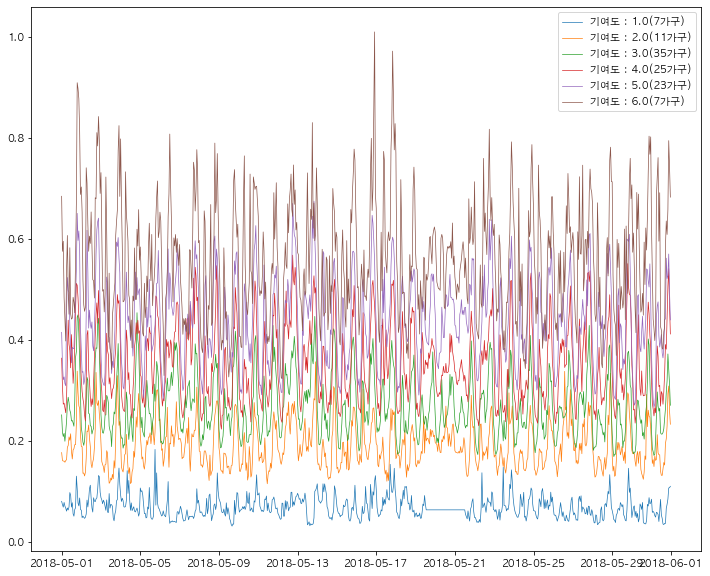

In [201]:
cols = df.columns

plt.figure(figsize=(12,10))

for cont in set(cont_mean_df):
    hh = df[cols[cont_mean_df == cont]]
    pat = hh.mean(axis=1)
    
    plt.plot(pat, label="기여도 : {}({}가구)".format(cont, len(hh.columns)), linewidth=0.7)
    
plt.legend()
plt.show()

# 요일 피드백 서비스

In [202]:
DAY_ARR = ["월", "화", "수", "목", "금", "토", "일"]
day_cont_np = np.array([])

for weekday in range(0, 7):
    day_cont = contribution_df.loc[
        contribution_df.index.weekday == weekday
    ].mean().round().values
    day_cont_np = np.append(
        day_cont_np,
        day_cont
    )
    
day_cont_df = pd.DataFrame(
    day_cont_np.reshape(7, -1),
    columns=df.columns,
    index=DAY_ARR
)
day_cont_df

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
월,2.0,2.0,3.0,1.0,1.0,2.0,3.0,4.0,3.0,3.0,...,3.0,4.0,4.0,4.0,6.0,5.0,3.0,3.0,5.0,4.0
화,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,3.0,4.0,4.0,4.0,6.0,4.0,3.0,3.0,4.0,4.0
수,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,3.0,4.0,5.0,3.0,6.0,4.0,3.0,3.0,4.0,4.0
목,2.0,2.0,3.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,3.0,4.0,5.0,3.0,6.0,4.0,3.0,3.0,4.0,4.0
금,2.0,2.0,3.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,...,3.0,4.0,4.0,4.0,6.0,4.0,3.0,3.0,5.0,4.0
토,2.0,2.0,3.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,...,3.0,4.0,4.0,4.0,6.0,4.0,3.0,3.0,5.0,5.0
일,3.0,3.0,3.0,1.0,1.0,2.0,3.0,4.0,2.0,3.0,...,3.0,4.0,4.0,4.0,6.0,4.0,3.0,3.0,5.0,5.0


In [203]:
data_np = df.values
division_data_np = data_np.reshape(-1, size, len(data_np[0]))

sum_division_data_np = division_data_np.sum(axis=1)
sum_df = pd.DataFrame(
    sum_division_data_np,
    columns=df.columns,
    index=contribution_df.index
)

day_sum_np = np.array([])
for weekday in range(0, 7):
    day_sum = sum_df.loc[
        sum_df.index.weekday == weekday
    ].sum().round().values
    day_sum_np = np.append(
        day_sum_np,
        day_sum
    )
    
day_sum_df = pd.DataFrame(
    day_sum_np.reshape(7, -1),
    columns=df.columns,
    index=DAY_ARR
)
day_sum_df

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
월,21.0,20.0,22.0,1.0,10.0,20.0,26.0,28.0,26.0,26.0,...,27.0,33.0,36.0,30.0,47.0,37.0,24.0,26.0,44.0,37.0
화,27.0,24.0,16.0,1.0,11.0,27.0,36.0,35.0,37.0,32.0,...,31.0,49.0,43.0,40.0,66.0,43.0,32.0,31.0,53.0,47.0
수,26.0,23.0,21.0,1.0,10.0,27.0,33.0,36.0,36.0,31.0,...,33.0,46.0,49.0,36.0,66.0,39.0,33.0,30.0,45.0,43.0
목,24.0,23.0,27.0,1.0,13.0,27.0,35.0,36.0,32.0,29.0,...,32.0,45.0,50.0,38.0,64.0,39.0,37.0,27.0,44.0,45.0
금,21.0,18.0,21.0,1.0,14.0,21.0,27.0,28.0,19.0,23.0,...,24.0,34.0,39.0,30.0,48.0,32.0,26.0,24.0,40.0,35.0
토,21.0,22.0,26.0,1.0,8.0,22.0,29.0,29.0,27.0,25.0,...,29.0,37.0,36.0,34.0,53.0,32.0,26.0,23.0,46.0,47.0
일,24.0,21.0,29.0,1.0,9.0,20.0,29.0,32.0,23.0,23.0,...,28.0,33.0,32.0,33.0,55.0,38.0,27.0,25.0,48.0,40.0


In [204]:
print("전체 특징")
print(day_sum_df.mean(axis=1))
print()

print("미확인 가구 정보")
for UFO in _UFO:
    print(UFO)
    print(day_cont_df[UFO])
    print()

전체 특징
월    30.759259
화    38.638889
수    38.203704
목    37.962963
금    30.046296
토    31.518519
일    32.185185
dtype: float64

미확인 가구 정보


# 요일 피드백 서비스

In [205]:
# 간격 체크 idx
# 간격이 넓은 idx 체크
_next_err_list
_next_mean
term_idxes = list()
_cont_check = list(set(cont_mean_df))

_cont_check
_next_err_list
for idx,_err in enumerate(_next_err_list):
    if _err > _next_mean:
        term_idxes.append(idx)
        
term_idxes

[0, 4]

In [206]:
# type one 1: min
cols_type_1 = df.columns[
    cont_mean_df <= _cont_check[term_idxes[0]]
]

# type one 2: median
cols_type_2 = df.columns[
    (cont_mean_df > _cont_check[term_idxes[0]])
    &
    (cont_mean_df <= _cont_check[term_idxes[1]])
]

# type one 3: max
cols_type_3 = df.columns[
    (cont_mean_df > _cont_check[term_idxes[1]])
    &
    (cont_mean_df <= _cont_check[len(_cont_check) - 1])
]

가구 A의 사용량은 75.0kWh이며, 가구 B의 사용량은 395.0kWh 입니다.
가장 차이가 많이 나는 요일은 월요일 입니다.


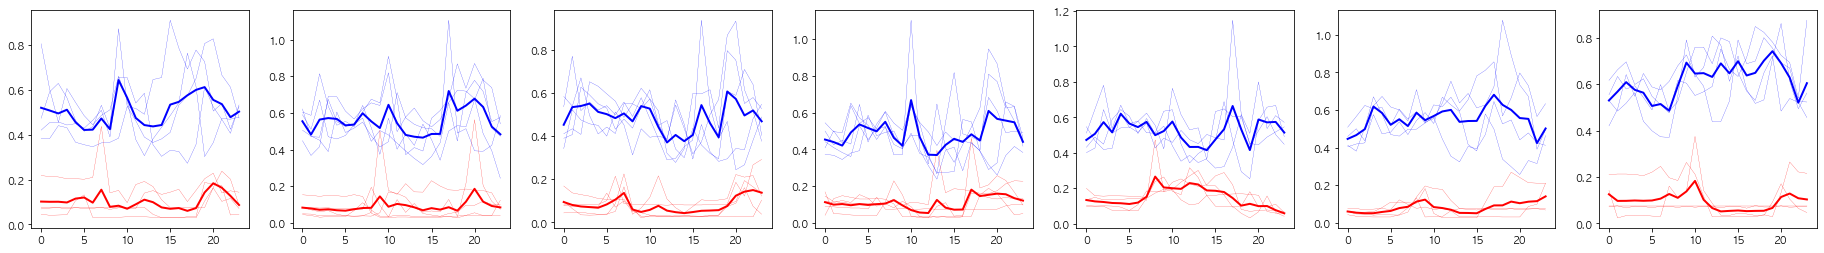

In [207]:
fig, ax = plt.subplots(1, 7, figsize=(32,4))

max_err_weekday = 0
max_err = 0 

A_col = cols_type_1[ran.randrange(0, len(cols_type_1))]
B_col = cols_type_3[ran.randrange(0, len(cols_type_3))]

A_day = day_cont_df[A_col]
B_day = day_cont_df[B_col]

for day,_m1 in enumerate(A_day):
    _m2 = B_day[day]
    
    _pat_1 = df[A_col][df[A_col].index.weekday == day].values.reshape(-1,24)
    _pat_2 = df[B_col][df[B_col].index.weekday == day].values.reshape(-1,24)

    for pat_idx, pat_1 in enumerate(_pat_1):
        pat_2 = _pat_2[pat_idx]
        ax[day].plot(pat_1, color='r', linewidth=0.2)
        ax[day].plot(pat_2, color='b', linewidth=0.2)

    ax[day].plot(_pat_1.mean(axis=0), color='r', linewidth=2)
    ax[day].plot(_pat_2.mean(axis=0), color='b', linewidth=2)
    
    err = _m1 - _m2
    if err > max_err:
        max_err_weekday = day
        max_err =err
    
print("가구 A의 사용량은 {}kWh이며, 가구 B의 사용량은 {}kWh 입니다.".format(
    df[A_col].sum().round(),
    df[B_col].sum().round()
))
print("가장 차이가 많이 나는 요일은 {}요일 입니다.".format(DAY_ARR[max_err_weekday]))
plt.show()

# 시간 피드백 서비스

In [208]:
contribution_df[:8].mean()

아파트1-104-1206    2.500
아파트1-104-303     1.375
아파트1-104-1307    1.750
아파트1-104-1208    1.000
아파트1-104-408     1.000
                 ...  
아파트1-103-903     3.500
아파트1-103-1106    2.500
아파트1-103-705     2.250
아파트1-103-1505    3.250
아파트1-103-406     4.375
Length: 108, dtype: float64

In [209]:
TIME_ARR = ["{}시 ~ {}시".format(_, _+2) for _ in range(0, 24, 3)]
print(TIME_ARR)

cont_time_df = pd.DataFrame(
    contribution_df.values.reshape(-1, int(24 / size), len(df.columns)).mean(axis=0).round(),
    index = TIME_ARR,
    columns = df.columns
)
cont_time_df

['0시 ~ 2시', '3시 ~ 5시', '6시 ~ 8시', '9시 ~ 11시', '12시 ~ 14시', '15시 ~ 17시', '18시 ~ 20시', '21시 ~ 23시']


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0시 ~ 2시,3.0,3.0,3.0,1.0,1.0,2.0,2.0,4.0,3.0,2.0,...,4.0,3.0,4.0,3.0,6.0,5.0,2.0,2.0,5.0,5.0
3시 ~ 5시,3.0,3.0,3.0,1.0,1.0,2.0,3.0,4.0,2.0,2.0,...,3.0,4.0,5.0,3.0,6.0,5.0,3.0,3.0,5.0,5.0
6시 ~ 8시,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,...,2.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,5.0,4.0
9시 ~ 11시,2.0,2.0,2.0,1.0,1.0,3.0,4.0,4.0,3.0,2.0,...,3.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,4.0
12시 ~ 14시,2.0,2.0,3.0,1.0,1.0,3.0,4.0,3.0,2.0,2.0,...,3.0,4.0,3.0,4.0,6.0,4.0,2.0,3.0,4.0,4.0
15시 ~ 17시,2.0,2.0,2.0,1.0,1.0,3.0,4.0,3.0,3.0,4.0,...,3.0,5.0,4.0,4.0,6.0,3.0,3.0,4.0,5.0,4.0
18시 ~ 20시,2.0,2.0,2.0,1.0,1.0,2.0,4.0,3.0,4.0,3.0,...,3.0,4.0,5.0,4.0,6.0,3.0,4.0,3.0,5.0,4.0
21시 ~ 23시,2.0,2.0,3.0,1.0,1.0,2.0,2.0,4.0,3.0,3.0,...,4.0,3.0,5.0,3.0,6.0,4.0,3.0,2.0,4.0,5.0


가구 A의 사용량은 75.0kWh이며, 가구 B의 사용량은 454.0kWh 입니다.
사용량면에서 가장 차이가 많이 나는 시간대는 6시 ~ 8시 입니다.
기여도면에서 가장 차이가 많이 나는 시간대는 0시 ~ 2시 입니다.


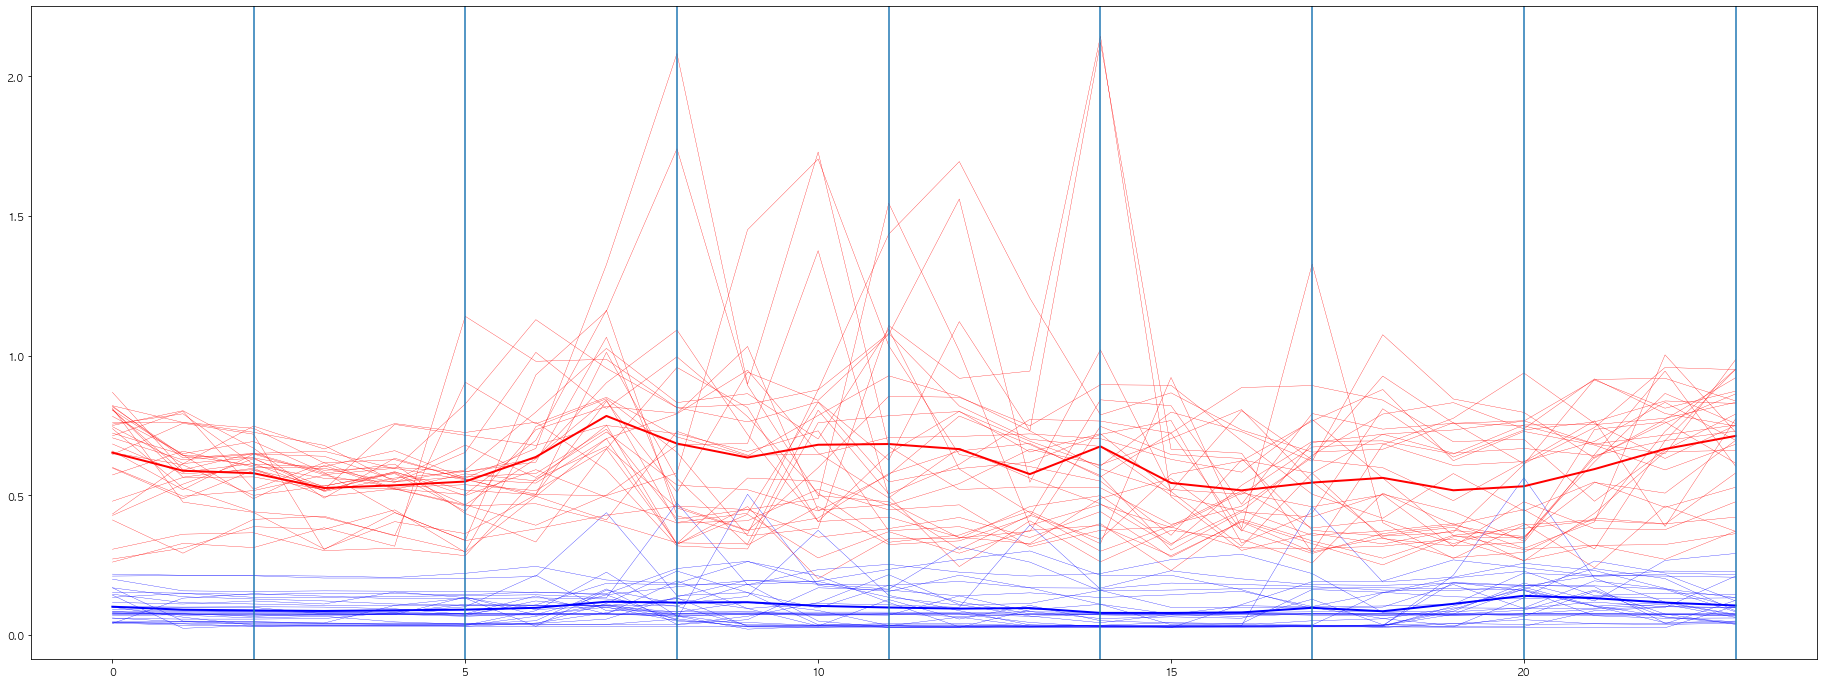

In [210]:
plt.figure(figsize=(32,12))

max_err_time = 0
max_err = 0 

mean_err_time = 0
mean_err = 0

A_col = cols_type_1[ran.randrange(0, len(cols_type_1))]
B_col = cols_type_3[ran.randrange(0, len(cols_type_3))]

A_time = cont_time_df[A_col]
B_time = cont_time_df[B_col]

for idx in range(0, int(len(df) / 24)):
    _pat_1 = df[24 * idx: 24 * (idx + 1)][A_col].values
    _pat_2 = df[24 * idx: 24 * (idx + 1)][B_col].values
    
    plt.plot(_pat_1, color='b', linewidth=0.3)
    plt.plot(_pat_2, color='r', linewidth=0.3)
    
A_mean_time = df[A_col].values.reshape(-1 ,24).mean(axis=0).reshape(-1, size).mean(axis=1)
B_mean_time = df[B_col].values.reshape(-1 ,24).mean(axis=0).reshape(-1, size).mean(axis=1)


for idx, _mean_pat_1 in enumerate(A_mean_time):
    _mean_pat_2 = B_mean_time[idx]
    
    err = abs(_mean_pat_1 - _mean_pat_2)
    if mean_err < err:
        mean_err_time = idx
        mean_err = err
    
plt.plot(df[A_col].values.reshape(-1, 24).mean(axis=0), color='b', linewidth=2)
plt.plot(df[B_col].values.reshape(-1, 24).mean(axis=0), color='r', linewidth=2)

for idx,time in enumerate(range(2, 24, size)):
    time_col = TIME_ARR[idx]
    _A_time_cont = A_time[time_col]
    _B_time_cont = B_time[time_col]
    
    err = abs(_A_time_cont - _B_time_cont)
    if err > max_err:
        max_err_time = idx
        max_err = err
        
    plt.axvline(time)
    
print("가구 A의 사용량은 {}kWh이며, 가구 B의 사용량은 {}kWh 입니다.".format(
    df[A_col].sum().round(),
    df[B_col].sum().round()
))
print("사용량면에서 가장 차이가 많이 나는 시간대는 {} 입니다.".format(TIME_ARR[mean_err_time]))
print("기여도면에서 가장 차이가 많이 나는 시간대는 {} 입니다.".format(TIME_ARR[max_err_time]))
plt.show()

plt.show()